Задание

Попробовать методы регрессии на своих наборах данных. Работа будет засчитана, если коэффициент детерминации будет не меньше, чем 0.85. Чтобы достигнуть этой метрики вам понадобится:


загрузить данные

проанализировать их

предобработать данные

попробовать разные методы регрессии

получить метрики

визуализировать регрессию на одном из параметров


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import warnings
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
## 1)Загрузить данные
df = pd.read_csv('/content/drive/MyDrive/ML/Credit_Data.csv')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
## 2)Проанализировать данные
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [ ]:
df.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [ ]:
## 3)Предобработать данные
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 2})
df['Ethnicity'] = df['Ethnicity'].replace({'Caucasian': 1, 'Asian': 2, 'African American': 3})
df = df.replace({'Yes': 1, 'No': 2})
df.head()

<ipython-input-9-58086befe060>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 2})
<ipython-input-9-58086befe060>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ethnicity'] = df['Ethnicity'].replace({'Caucasian': 1, 'Asian': 2, 'African American': 3})
<ipython-input-9-58086befe060>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. T

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,2,1,1,333
1,2,106.025,6645,483,3,82,15,2,1,1,2,903
2,3,104.593,7075,514,4,71,11,1,2,2,2,580
3,4,148.924,9504,681,3,36,11,2,2,2,2,964
4,5,55.882,4897,357,2,68,16,1,2,1,1,331


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    int64  
 8   Student    400 non-null    int64  
 9   Married    400 non-null    int64  
 10  Ethnicity  400 non-null    int64  
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


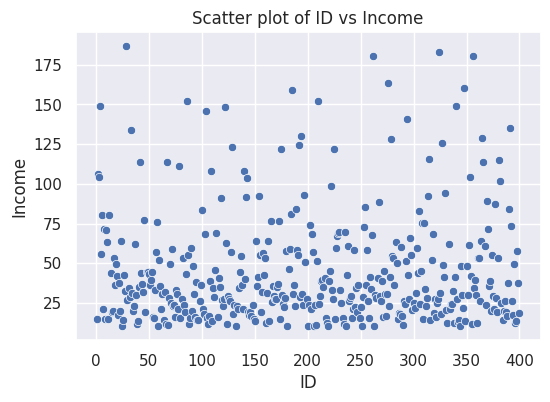

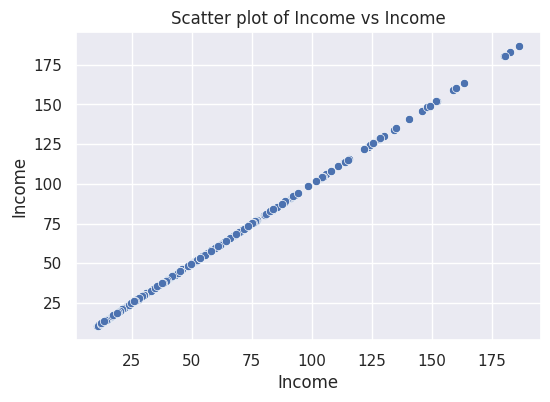

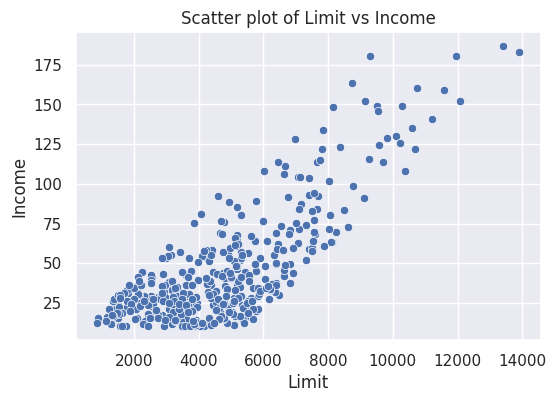

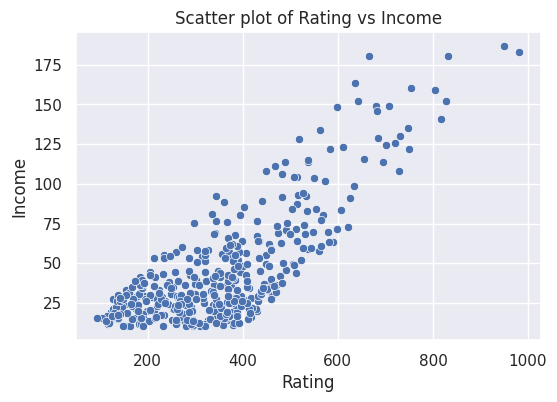

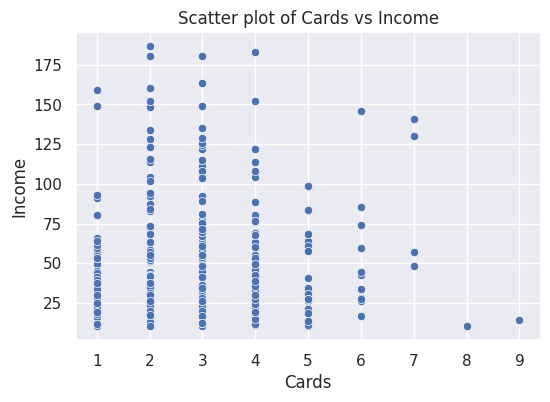

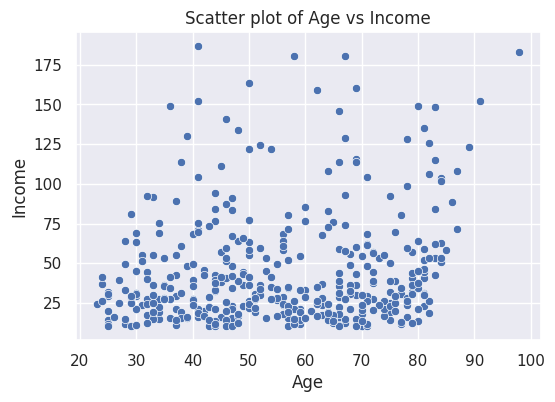

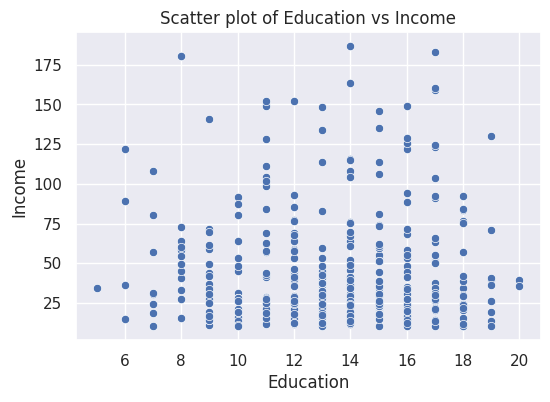

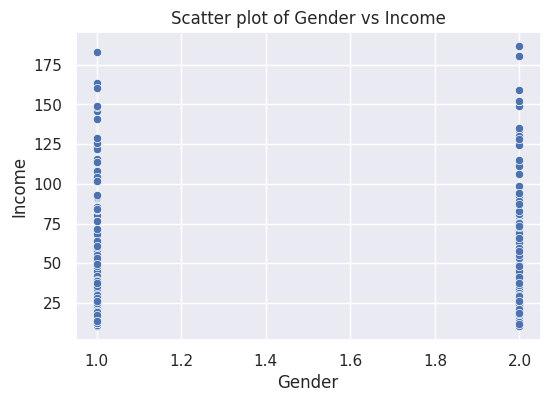

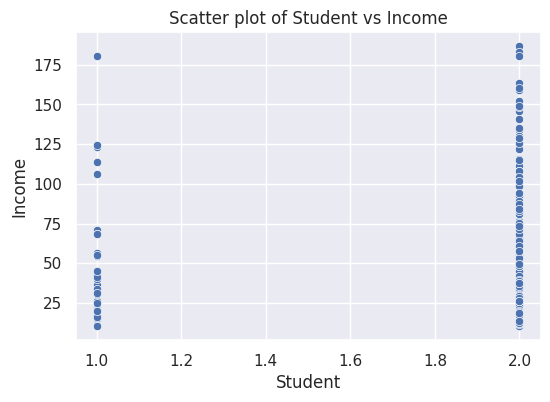

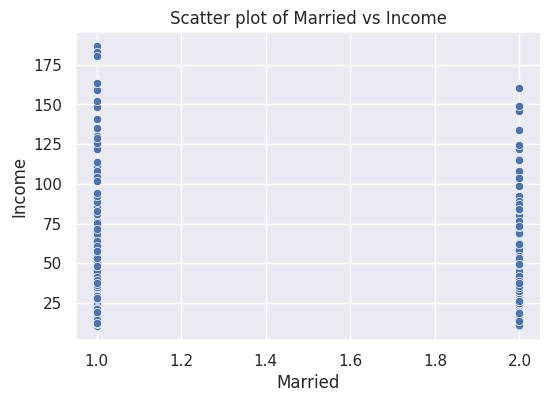

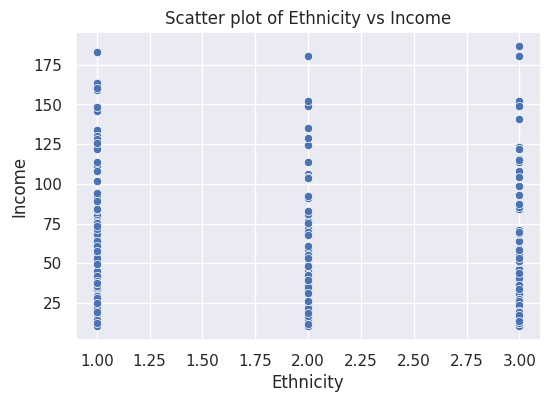

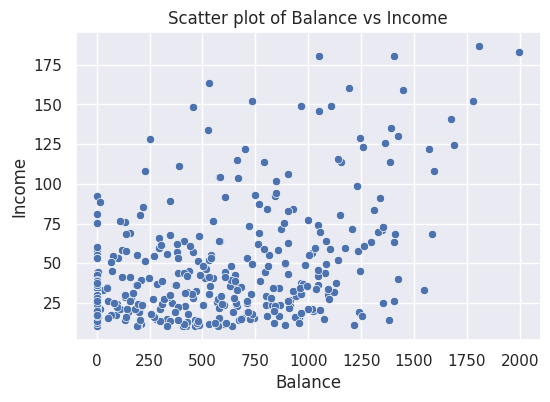

In [ ]:
own_column = 'Income'

for feature in df:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[own_column])
    plt.title(f'Scatter plot of {feature} vs {own_column}')
    plt.show()

In [ ]:
## 4)Попробовать разные методы регрессии
# подготавливаем датасет к обучению
X = df.drop(['Income'], axis=1)
y = df['Income']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (400, 11) | y shape: (400,) 


In [ ]:
# делим датасет на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
#Линейная регрессия
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()

modelLR.fit(X_train, y_train)

y_pr_LR = modelLR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  11.3518
  R2: 0.881
 Adjusted R2: 0.8617
 Cross Validated R2: 0.8713


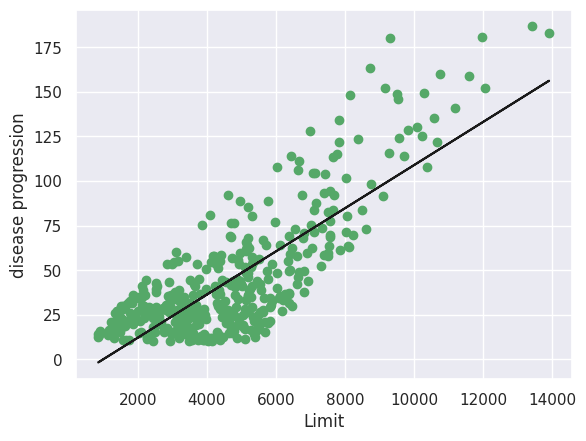

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['Limit'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['Income'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Limit', size=12)
plt.show()

In [ ]:
# Регрессия дерева принятия решений
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()

modelDT.fit(X_train, y_train)

y_dt_pred = modelDT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  12.2447
  R2: 0.8615
 Adjusted R2: 0.8391
 Cross Validated R2: 0.7038


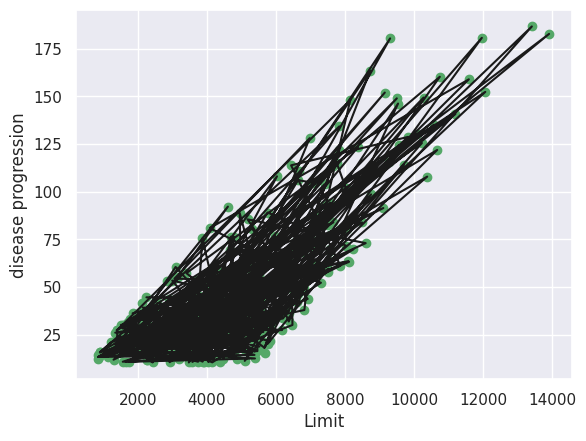

In [23]:
model2 = DecisionTreeRegressor()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Limit', size=12)
plt.show()

In [ ]:
# Регрессия случайного леса
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)

modelRF.fit(X_train, y_train)

y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8.7976
  R2: 0.9285
 Adjusted R2: 0.9169
 Cross Validated R2: 0.8601


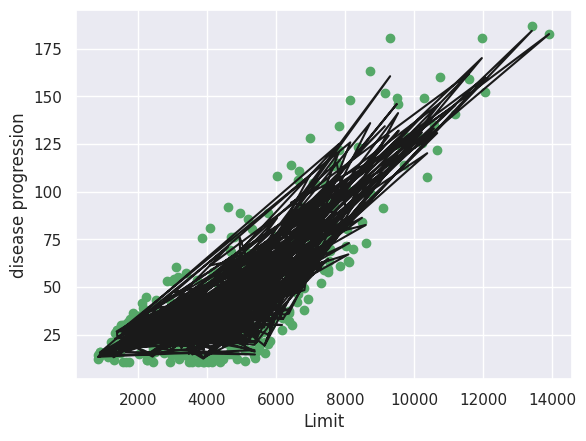

In [24]:
model2 = RandomForestRegressor()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Limit', size=12)
plt.show()

In [ ]:
# Регрессия лассо
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0, max_iter=10000)

lasso.fit(X_train, y_train)

y_lasso_pred = lasso.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(lasso, X_train, y_train, X_test, y_test, y_lasso_pred)

RMSE:  11.8783
  R2: 0.8697
 Adjusted R2: 0.8486
 Cross Validated R2: 0.8602


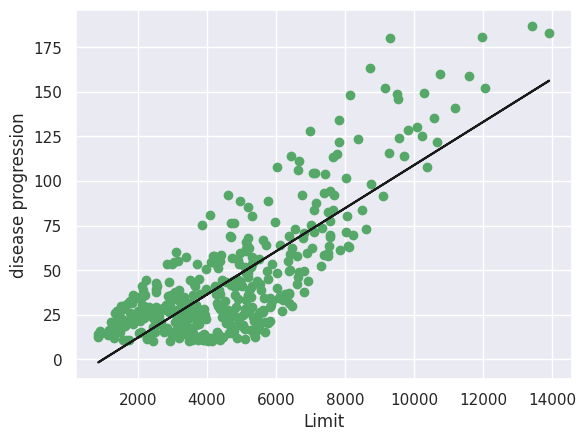

In [25]:
model2 = Lasso()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Limit', size=12)
plt.show()

In [ ]:
#Байесовская линейная регрессия
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()

bayesian_ridge.fit(X_train, y_train)

y_bayesian_pred = bayesian_ridge.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(bayesian_ridge, X_train, y_train, X_test, y_test, y_bayesian_pred)

RMSE:  15.7142
  R2: 0.7719
 Adjusted R2: 0.735
 Cross Validated R2: 0.772


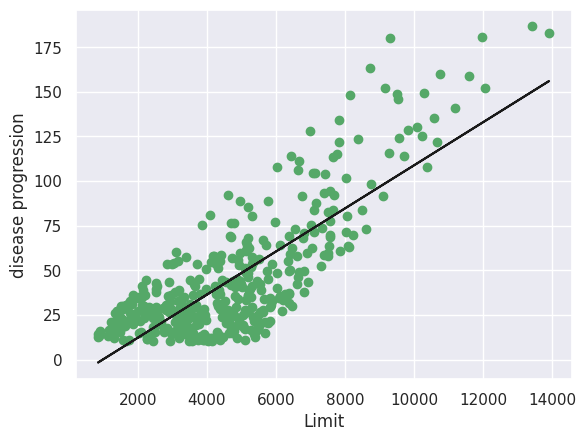

In [26]:
model2 = BayesianRidge()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Limit', size=12)
plt.show()